In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn import preprocessing
from sklearn.metrics import precision_score
data_path = "./data/"

In [4]:
#トレインデータをpandasで取得
train_data = pd.read_csv("data/application_train.csv")
test_data =  pd.read_csv("data/application_test.csv")

In [148]:
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,1.0,0.0,1.0,0,0.001512,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,0.0,0.0,0.0,0,0.002089,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,1.0,1.0,1.0,0,0.000358,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,0.0,0.0,1.0,0,0.000935,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,1.0,0.0,1.0,0,0.000819,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#train_dataの２パターン項目をバイナリにする
#性別をM→1, F→0
#車を持ってたら→1, 持ってなかったら→0
#不動産（Realty）持ってたら→1, 持ってなかったら→0
train_data["CODE_GENDER"] = np.where(train_data["CODE_GENDER"]=="M", 1, 0)
train_data["FLAG_OWN_CAR"] = np.where(train_data["FLAG_OWN_CAR"]=="Y", 1, 0)
train_data["FLAG_OWN_REALTY"] = np.where(train_data["FLAG_OWN_REALTY"]=="Y", 1, 0)

In [6]:
#test_dataの２パターン項目をバイナリにする
#性別をM→1, F→0
#車を持ってたら→1, 持ってなかったら→0
#不動産（Realty）持ってたら→1, 持ってなかったら→0
test_data["CODE_GENDER"] = np.where(test_data["CODE_GENDER"]=="M", 1, 0)
test_data["FLAG_OWN_CAR"] = np.where(test_data["FLAG_OWN_CAR"]=="Y", 1, 0)
test_data["FLAG_OWN_REALTY"] = np.where(test_data["FLAG_OWN_REALTY"]=="Y", 1, 0)

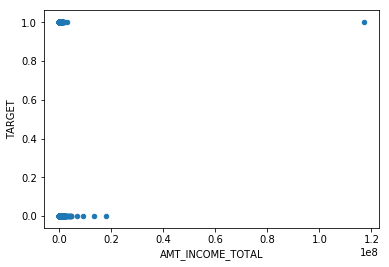

In [7]:
train_data.plot.scatter(x = "AMT_INCOME_TOTAL", y = "TARGET")

In [79]:
#train_data= train_data[train_data.AMT_INCOME_TOTAL <= 0.8*10**8]

In [8]:
#normalize train_data for neural network
train_data["TARGET"] = train_data["TARGET"].values.astype("float")
train_data["CODE_GENDER"] = train_data["CODE_GENDER"].values.astype("float")
train_data["FLAG_OWN_CAR"] = train_data["FLAG_OWN_CAR"].values.astype("float")
train_data["FLAG_OWN_REALTY"] = train_data["FLAG_OWN_REALTY"].values.astype("float")
train_data["CNT_CHILDREN"] = train_data["CNT_CHILDREN"].values.astype("float")
x = train_data[["CNT_CHILDREN"]].values.astype("float")
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_data["CNT_CHILDREN"] = pd.DataFrame(x_scaled)

In [10]:
#normalize test_data for neural network
test_data["CODE_GENDER"] = test_data["CODE_GENDER"].values.astype("float")
test_data["FLAG_OWN_CAR"] = test_data["FLAG_OWN_CAR"].values.astype("float")
test_data["FLAG_OWN_REALTY"] = test_data["FLAG_OWN_REALTY"].values.astype("float")
test_data["CNT_CHILDREN"] = test_data["CNT_CHILDREN"].values.astype("float")
x = test_data[["CNT_CHILDREN"]].values.astype("float")
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
test_data["CNT_CHILDREN"] = pd.DataFrame(x_scaled)

In [19]:
#difine neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, 3)
        self.fc2 = nn.Linear(3, 2)
        self.fc3 = nn.Linear(2, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x

net = Net()
softmax = nn.Softmax
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
running_loss = 0

#入力はcode_gender, flag_own_car, flag_own_realty
#どれもバイナリだから８通りしかないからパターンを見いだせるわけがない
for epoch in range(2):
    for i in range(len(train_data)):
        inputs = torch.tensor([train_data.iloc[i, 3], train_data.iloc[i, 4], train_data.iloc[i, 5]])
        labels = torch.tensor([train_data.iloc[i, 1]])
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i %10000 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i, running_loss / 10000))
            running_loss = 0.0

[1,     0] loss: 0.000
[1, 10000] loss: 0.283
[1, 20000] loss: 0.280
[1, 30000] loss: 0.285
[1, 40000] loss: 0.286
[1, 50000] loss: 0.278
[1, 60000] loss: 0.276
[1, 70000] loss: 0.282
[1, 80000] loss: 0.281
[1, 90000] loss: 0.285
[1, 100000] loss: 0.287
[1, 110000] loss: 0.299
[1, 120000] loss: 0.279
[1, 130000] loss: 0.283
[1, 140000] loss: 0.283
[1, 150000] loss: 0.291
[1, 160000] loss: 0.276
[1, 170000] loss: 0.279
[1, 180000] loss: 0.277
[1, 190000] loss: 0.277
[1, 200000] loss: 0.281
[1, 210000] loss: 0.287
[1, 220000] loss: 0.276
[1, 230000] loss: 0.276
[1, 240000] loss: 0.270
[1, 250000] loss: 0.296
[1, 260000] loss: 0.277
[1, 270000] loss: 0.271
[1, 280000] loss: 0.278
[1, 290000] loss: 0.278
[1, 300000] loss: 0.279
[2,     0] loss: 0.207
[2, 10000] loss: 0.273
[2, 20000] loss: 0.280
[2, 30000] loss: 0.285
[2, 40000] loss: 0.286
[2, 50000] loss: 0.278
[2, 60000] loss: 0.276
[2, 70000] loss: 0.282
[2, 80000] loss: 0.281
[2, 90000] loss: 0.285
[2, 100000] loss: 0.287
[2, 110000] 

In [22]:
#test: 
accuracy = 0
data_length = len(train_data)
y_true = train_data["TARGET"]
y_pred = []
for i in range(data_length):
    inputs = torch.tensor([train_data.iloc[i, 3], train_data.iloc[i, 4], train_data.iloc[i, 5]])
    outputs = net(inputs)
    #if outputs.item() >= 0.5:
    #    outputs = 1.0
    #else:
    #    outputs = 0.0
    
    
    #if outputs == train_data.iloc[i, 1]:
    #    accuracy += 1
    y_pred.append(outputs.item())
    
#print(accuracy/data_length)

In [26]:
i = 4
[train_data.iloc[i, 3], train_data.iloc[i, 4], train_data.iloc[i, 5]]

[1.0, 0.0, 1.0]